# Image Augmentation Demo
This shows a demo of image augmentation and the resulting images. It creates one without augmentation and one with augmentation to show the difference

In [1]:
from glob import glob
from hyperspectral_image_generator import hyperspectral_image_generator
import matplotlib.pyplot as plt

In [2]:
# variables
path_to_images = './images_for_notebook'
batch_size = 4
class_indices = {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3}

In [3]:
no_augmentation_parameters = {'flip': False,
                            'zoom': 1.0,
                            'shift': 0.0,
                            'rotation': 0.0,
                            'sheer': 0.0,
                            'noising': None}
augmentation_parameters = {'flip': True,
                            'zoom': 1.2,
                            'shift': 0.1,
                            'rotation': 10.0,
                            'sheer': 0.01,
                            'noising': None}

In [4]:
image_files = glob(path_to_images + "/**/*.tif")
print(image_files)

['./images_for_notebook\\AnnualCrop\\AnnualCrop_1.tif', './images_for_notebook\\Forest\\Forest_3.tif', './images_for_notebook\\HerbaceousVegetation\\HerbaceousVegetation_7.tif', './images_for_notebook\\Highway\\Highway_1.tif']


In [5]:
noaug_image_generator = hyperspectral_image_generator(image_files, class_indices,
                                                batch_size=batch_size,
                                                image_mean='image_mean_std.txt',
                                                rotation_range=no_augmentation_parameters['rotation'],
                                                horizontal_flip=no_augmentation_parameters['flip'],
                                                vertical_flip=no_augmentation_parameters['flip'],
                                                speckle_noise=no_augmentation_parameters['noising'],
                                                shear_range=no_augmentation_parameters['sheer'],
                                                scale_range=no_augmentation_parameters['zoom'],
                                                transform_range=no_augmentation_parameters['shift']
                                                )
aug_image_generator = hyperspectral_image_generator(image_files, class_indices,
                                                batch_size=batch_size,
                                                image_mean='image_mean_std.txt',
                                                rotation_range=augmentation_parameters['rotation'],
                                                horizontal_flip=augmentation_parameters['flip'],
                                                vertical_flip=augmentation_parameters['flip'],
                                                speckle_noise=augmentation_parameters['noising'],
                                                shear_range=augmentation_parameters['sheer'],
                                                scale_range=augmentation_parameters['zoom'],
                                                transform_range=augmentation_parameters['shift']
                                                )

c:\users\laptomon\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(4, 64, 64, 13)


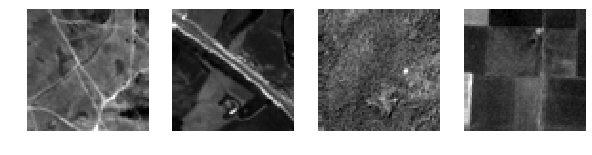

In [6]:
# No augmentation case
data = next(noaug_image_generator)
images = data[0]
print(images.shape)
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for idx, ax in enumerate(axs):
    ax.imshow(images[idx, :, :, 1], cmap='gray')
    ax.axis('off')
plt.show()

(4, 64, 64, 13)


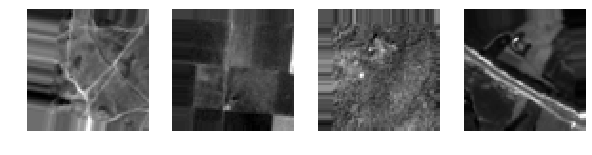

In [7]:
# Augmentation case
data = next(aug_image_generator)
images = data[0]
print(images.shape)
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for idx, ax in enumerate(axs):
    ax.imshow(images[idx, :, :, 1], cmap='gray')
    ax.axis('off')
plt.show()